In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
pima = pd.read_csv("./cl1.csv")
print(pima.head())

   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age  Outcome  
0  33.6                     0.627   50        1  
1  26.6                     0.351   31        0  
2  23.3                     0.672   32        1  
3  28.1                     0.167   21        0  
4  43.1                     2.288   33        1  


In [2]:
# Split the data into features (X) and target variable (y)
X = pima.drop(columns='Outcome')
y = pima['Outcome']

In [3]:
# Number of negative and positive cases in the data
num_obs = len(pima)
negative = len(pima.loc[pima['Outcome'] == 0])
positive = len(pima.loc[pima['Outcome'] == 1])
print("Number of negative cases:  {0} ({1:2.2f}%)".format(negative, ((1.00 * negative)/(1.0 * num_obs)) * 100))
print("Number of positve cases:  {0} ({1:2.2f}%)".format(positive, ((1.00 * positive)/(1.0 * num_obs)) * 100))

Number of negative cases:  123 (64.06%)
Number of positve cases:  69 (35.94%)


In [4]:
# Split xscale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0) 

In [5]:
# Number of each case in the data training and testing
print("Original negative : {0} ({1:0.2f}%)".format(len(pima.loc[pima['Outcome'] == 0]), (len(pima.loc[pima['Outcome'] == 0])/len(pima.index)) * 100.0))
print("Original positive : {0} ({1:0.2f}%)".format(len(pima.loc[pima['Outcome'] == 1]), (len(pima.loc[pima['Outcome'] == 1])/len(pima.index)) * 100.0))
print("")
print("Training negative : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("Training positive : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("")
print("Test negative     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))
print("Test positive     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))

Original negative : 123 (64.06%)
Original positive : 69 (35.94%)

Training negative : 94 (61.44%)
Training positive : 59 (38.56%)

Test negative     : 29 (74.36%)
Test positive     : 10 (25.64%)


In [6]:
from sklearn.metrics import confusion_matrix
import math
def evaluate(Y_true, Y_predict):
    tn, fp, fn, tp = confusion_matrix(Y_true,Y_predict).ravel()
    acc = (tp +tn)/ (tp + tn + fn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = (2*tp)/(2*tp + fp + fn)
    specificity = tn / (fp + tn) 
    MCC = ((tp*tn) - (fp*fn)) / math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    return acc, precision, recall, f1_score, specificity, MCC

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

  #L500
  #----------------------------------------------
LR = LogisticRegression()
LR.fit(X_train, y_train)
yhatLR = LR.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, yhatLR))
print(classification_report(y_test, yhatLR))


Confusion Matrix: 
 [[24  5]
 [ 5  5]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.50      0.50      0.50        10

    accuracy                           0.74        39
   macro avg       0.66      0.66      0.66        39
weighted avg       0.74      0.74      0.74        39



c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
Diabetes(output = ['Outcome'])
print('------------')

['Outcome']  LR      acc:  0.7436    precision:   0.5000    recall :   0.5000   f1_score:   0.5000  specificity:   0.8276  MCC:   0.3276
------------


c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Outcome']  LR      acc:  0.7436    precision:   0.5000    recall :   0.5000   f1_score:   0.5000  specificity:   0.8276  MCC:   0.3276


c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


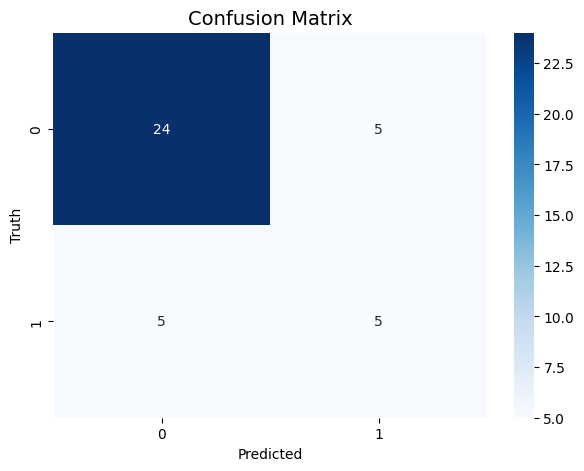

In [9]:
# Call the function
LR, yhatLR = Diabetes()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatLR)

# Plot confusion matrix using seaborn
plt.figure(figsize=(7,5))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

# Set labels
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [10]:
# training acc
from sklearn.metrics import confusion_matrix, classification_report
predictions1 = LR.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train, predictions1))
print(classification_report(y_train, predictions1))


Confusion Matrix: 
 [[79 15]
 [24 35]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        94
           1       0.70      0.59      0.64        59

    accuracy                           0.75       153
   macro avg       0.73      0.72      0.72       153
weighted avg       0.74      0.75      0.74       153



In [11]:
model = LogisticRegression(warm_start=True)

In [12]:
import utils
utils.set_initial_params(model, n_features=X_train.shape[1], n_classes=2)

In [17]:
import flwr as fl
import warnings
from sklearn.metrics import log_loss

class IrisClient(fl.client.NumPyClient):
        def get_parameters(self, config):  # type: ignore
            return utils.get_model_parameters(model)

        def fit(self, parameters, config):  # type: ignore
            utils.set_model_params(model, parameters)
            # Ignore convergence failure due to low local epochs
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                model.fit(X_train, y_train)
            accuracy = model.score(X_train, y_train)
            return (
                utils.get_model_parameters(model),
                len(X_train),
                {"train_accuracy": accuracy},
            )

        def evaluate(self, parameters, config):  # type: ignore
            utils.set_model_params(model, parameters)
            loss = log_loss(y_test, model.predict_proba(X_test))
            accuracy = model.score(X_test, y_test)
            return loss, len(X_test), {"test_accuracy": accuracy}

    # Start Flower client
fl.client.start_client(
    server_address="127.0.0.1:8080", client=IrisClient().to_client()
)

INFO flwr 2024-05-11 18:38:52,051 | grpc.py:52 | Opened insecure gRPC connection (no certificates were passed)
DEBUG flwr 2024-05-11 18:38:52,062 | connection.py:55 | ChannelConnectivity.IDLE
DEBUG flwr 2024-05-11 18:38:52,064 | connection.py:55 | ChannelConnectivity.READY


DEBUG flwr 2024-05-11 18:38:52,666 | connection.py:220 | gRPC channel closed
INFO flwr 2024-05-11 18:38:52,667 | app.py:398 | Disconnect and shut down


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
predictions1 = model.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[23  6]
 [ 4  6]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.50      0.60      0.55        10

    accuracy                           0.74        39
   macro avg       0.68      0.70      0.68        39
weighted avg       0.76      0.74      0.75        39



In [19]:
# training acc after fed
predictions1 = model.predict(X_train)
print("Confusion Matrix: \n", confusion_matrix(y_train, predictions1))
print(classification_report(y_train, predictions1))

Confusion Matrix: 
 [[78 16]
 [21 38]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        94
           1       0.70      0.64      0.67        59

    accuracy                           0.76       153
   macro avg       0.75      0.74      0.74       153
weighted avg       0.76      0.76      0.76       153



In [138]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [139]:
y_pred = xgb.predict(X_test)

In [140]:
# accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

1.0
0.6363636363636364


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\fafaf\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\fafaf\anaconda3\envs\tf\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\fafaf\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\fafaf\anaconda3\envs\tf\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing 